# **Author : Akash Jain**
# **Thyroid Disease Prediction** 

## Importing Libraries

In [1]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [2]:
# oad data into dataframe
df = pd.read_csv("thyroid.csv")

In [3]:
# Display first 5 rows of the dataframe
df.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
1,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
2,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
3,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3
4,0.69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.016,0.086,0.070,0.123,3


In [4]:
# number of rows and columns
df.shape

(7198, 22)

In [5]:
# statistical Measures of the dataset
df.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
count,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000,7198.000000
mean,0.520521,0.304390,0.130453,0.015421,0.012781,0.038344,0.010836,0.014032,0.016671,0.065574,0.068769,0.012642,0.008197,0.025563,0.000139,0.048902,0.004862,0.019976,0.109428,0.097836,0.113214,2.902890
std,0.189260,0.460181,0.336824,0.123228,0.112338,0.192039,0.103539,0.117630,0.128045,0.247553,0.253079,0.111733,0.090170,0.157837,0.011787,0.215679,0.022982,0.007539,0.035973,0.019082,0.036099,0.365817
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000500,0.002000,0.017000,0.002000,1.000000
25%,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000710,0.017000,0.089000,0.087000,0.095000,3.000000
50%,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001700,0.020100,0.107000,0.097000,0.111000,3.000000
75%,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002700,0.022000,0.125000,0.104000,0.127000,3.000000
max,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.530000,0.180000,0.600000,0.233000,0.642000,3.000000


In [6]:
# Some Informations about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7198 entries, 0 to 7197
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        7198 non-null   float64
 1   Sex                        7198 non-null   int64  
 2   On_thyroxine               7198 non-null   int64  
 3   Query_on_thyroxine         7198 non-null   int64  
 4   On_antithyroid_medication  7198 non-null   int64  
 5   Sick                       7198 non-null   int64  
 6   Pregnant                   7198 non-null   int64  
 7   Thyroid surgery            7198 non-null   int64  
 8   I131_treatment             7198 non-null   int64  
 9   Query_hypothyroid          7198 non-null   int64  
 10  Query_hyperthyroid         7198 non-null   int64  
 11  Lithium                    7198 non-null   int64  
 12  Goiter                     7198 non-null   int64  
 13  Tumor                      7198 non-null   int64

In [7]:
df.columns

Index(['Age', 'Sex', 'On_thyroxine', 'Query_on_thyroxine',
       'On_antithyroid_medication', 'Sick', 'Pregnant', 'Thyroid surgery',
       'I131_treatment', 'Query_hypothyroid', 'Query_hyperthyroid', 'Lithium',
       'Goiter', 'Tumor', 'Hypopituitary', 'Psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'Class'],
      dtype='object')

In [8]:
df['Class'].value_counts()

3    6665
2     367
1     166
Name: Class, dtype: int64

3 classes in target variable
* 3 - Hypothyroidism
* 2 - Hyperthroidism
* 1 - Normal

## Data Inspecting and Cleaning

In [9]:
# checking for missing values
df.isnull().sum()

Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid surgery              0
I131_treatment               0
Query_hypothyroid            0
Query_hyperthyroid           0
Lithium                      0
Goiter                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

## Exploratory Data Analysis

In [10]:
#Checking relationship between variables
cor=df.corr()
cor

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
Age,1.000000,-0.004575,0.005952,-0.005230,-0.050504,0.078815,-0.106789,-0.019801,0.060131,0.045090,-0.030477,-0.036450,-0.055778,-0.050448,-0.019341,-0.095050,-0.022134,-0.208658,-0.060380,-0.160996,0.029605,-0.035032
Sex,-0.004575,1.000000,-0.102034,0.051976,-0.029576,0.007843,-0.069237,-0.037844,-0.015391,-0.067903,-0.068808,0.033240,-0.003211,-0.072708,0.017819,0.108993,-0.043567,-0.045058,-0.151049,-0.220899,-0.026910,0.052634
On_thyroxine,0.005952,-0.102034,1.000000,-0.004955,-0.003678,-0.049417,-0.000699,0.020425,0.071990,0.112359,-0.017236,-0.006909,0.001387,-0.018304,-0.004566,-0.064876,0.013457,-0.009219,0.200367,0.036998,0.176827,0.064487
Query_on_thyroxine,-0.005230,0.051976,-0.004955,1.000000,-0.014240,-0.001504,0.030461,-0.005344,-0.016295,-0.019489,-0.025099,-0.014161,0.001127,-0.005983,0.094188,-0.028378,-0.014755,-0.009717,-0.010957,-0.024625,0.006946,0.017813
On_antithyroid_medication,-0.050504,-0.029576,-0.003678,-0.014240,1.000000,-0.022721,0.035874,-0.013574,0.014163,-0.025146,0.101036,-0.012875,-0.010344,-0.018429,-0.001341,-0.025801,-0.010894,0.097592,0.017793,0.049205,-0.010661,0.013302
Sick,0.078815,0.007843,-0.049417,-0.001504,-0.022721,1.000000,-0.020900,-0.005368,-0.026000,0.014326,-0.022815,-0.009644,-0.018153,-0.004838,-0.002354,-0.031860,-0.020259,-0.059564,-0.031698,-0.020953,-0.025290,0.017410
Pregnant,-0.106789,-0.069237,-0.000699,0.030461,0.035874,-0.020900,1.000000,-0.012486,-0.013628,-0.022306,0.088214,-0.011844,0.035133,0.102079,-0.001234,-0.011289,-0.017496,0.129712,0.128020,0.277352,-0.023555,0.027787
Thyroid surgery,-0.019801,-0.037844,0.020425,-0.005344,-0.013574,-0.005368,-0.012486,1.000000,0.002917,-0.002972,0.014256,-0.013499,-0.010845,0.003130,-0.001406,-0.027051,0.017268,-0.015748,-0.020801,0.012728,-0.021267,0.005838
I131_treatment,0.060131,-0.015391,0.071990,-0.016295,0.014163,-0.026000,-0.013628,0.002917,1.000000,0.053176,0.050371,-0.014734,-0.011837,-0.021089,-0.001535,-0.029525,0.012943,0.006770,-0.012024,0.018239,-0.018490,-0.018827
Query_hypothyroid,0.045090,-0.067903,0.112359,-0.019489,-0.025146,0.014326,-0.022306,-0.002972,0.053176,1.000000,0.016725,-0.009882,-0.011633,-0.032238,-0.003123,-0.031442,0.043103,-0.055093,-0.017704,0.008519,-0.023181,-0.081571


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

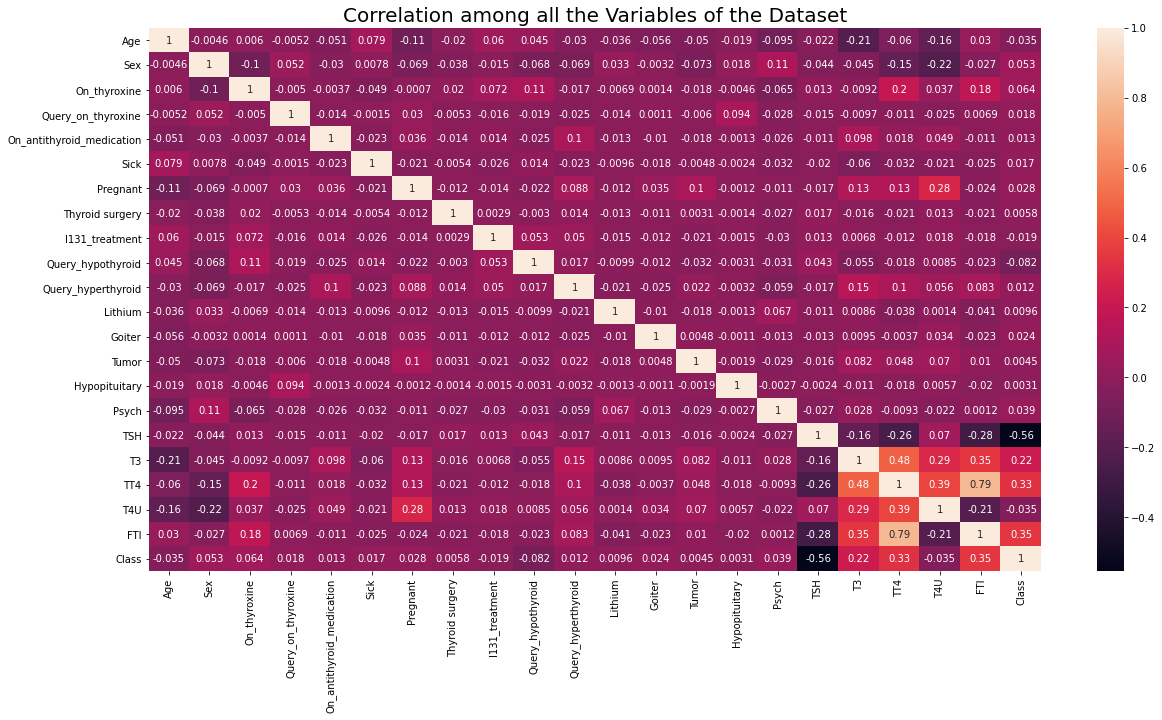

In [11]:
# Heatmap
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)

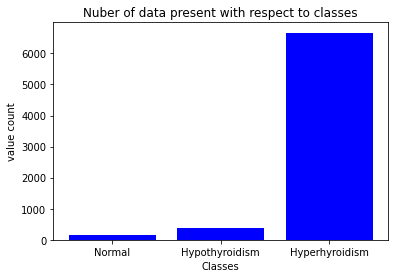

In [12]:
x_plot = ['Normal', 'Hypothyroidism', 'Hyperhyroidism']
y_plot = [166, 367, 6665]
plt.bar(x_plot, y_plot, data=df, color='blue')
plt.xlabel('Classes')
plt.ylabel('value count')
plt.title('Nuber of data present with respect to classes')
plt.show()

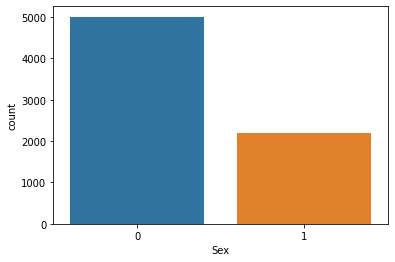

In [13]:
sns.countplot(x='Sex', data=df)

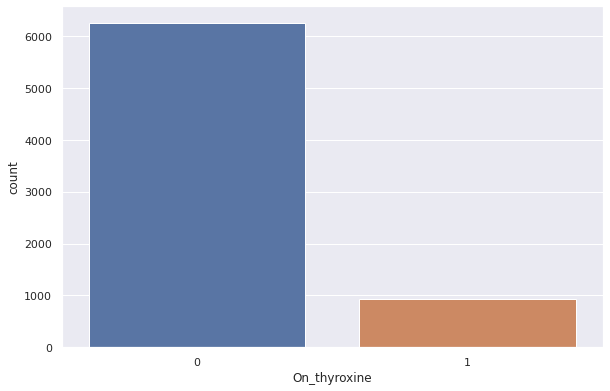

In [14]:
sns.set(rc={'figure.figsize':(9.7,6.27)})
sns.countplot(x='On_thyroxine', data=df)

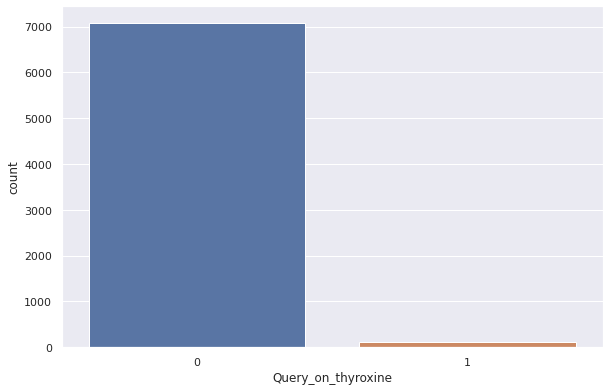

In [15]:
sns.countplot(x='Query_on_thyroxine', data=df)

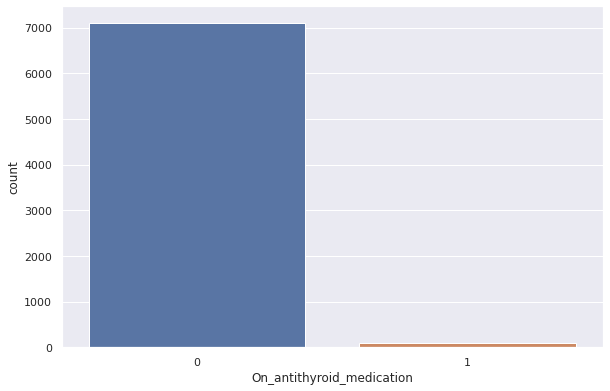

In [16]:
sns.countplot(x='On_antithyroid_medication', data=df)

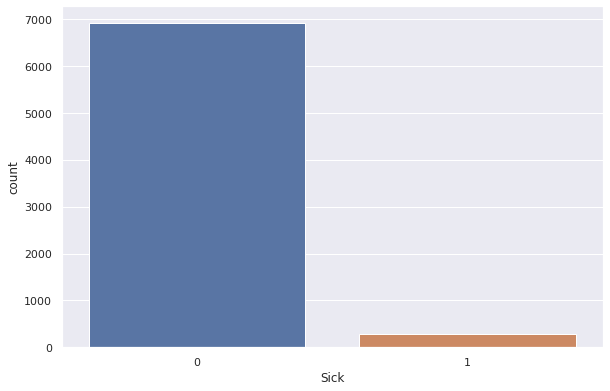

In [17]:
sns.countplot(x='Sick', data=df)

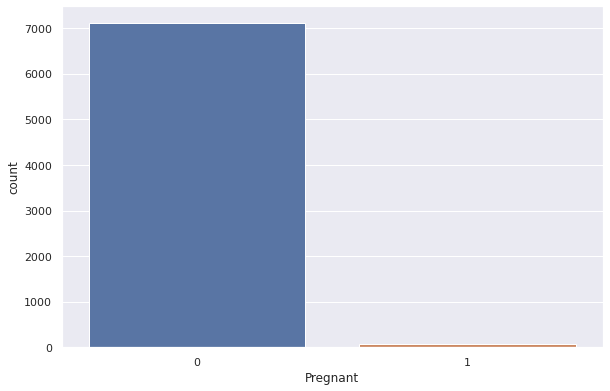

In [18]:
sns.countplot(x='Pregnant', data=df)

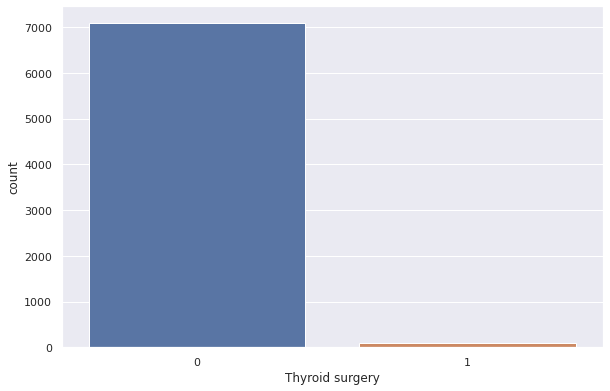

In [19]:
sns.countplot(x='Thyroid surgery', data=df)

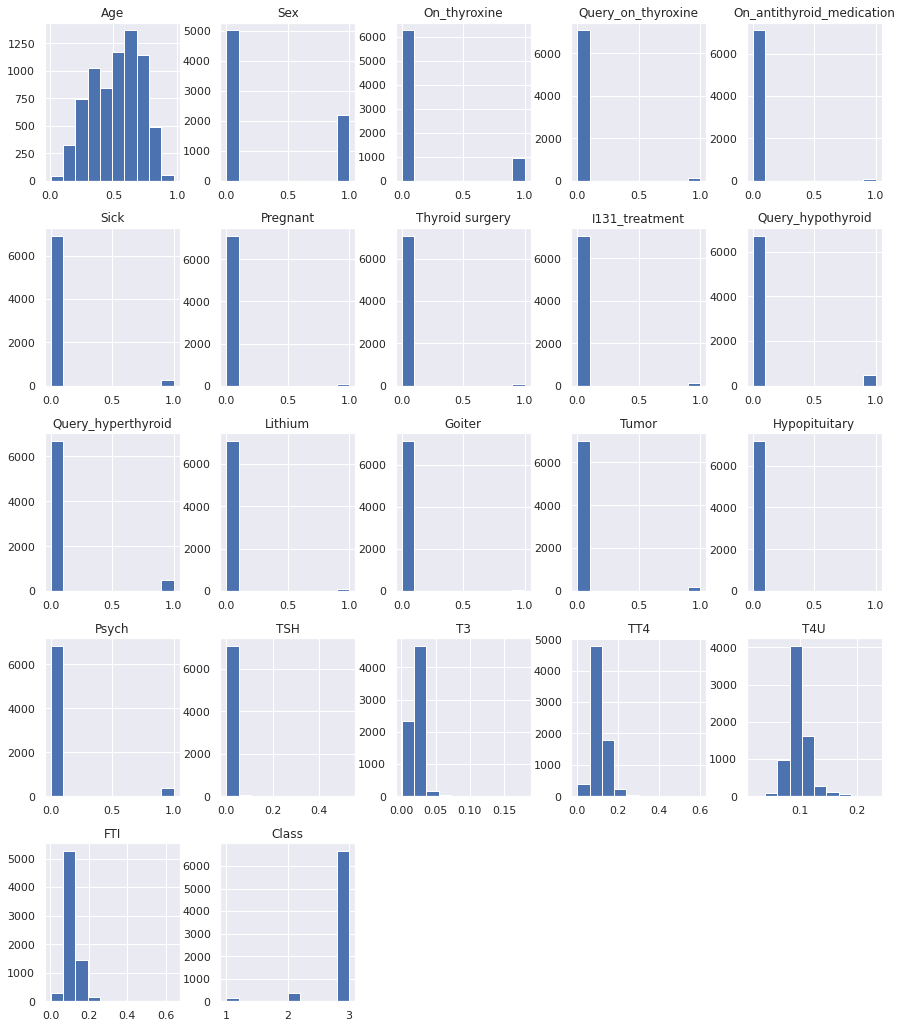

In [20]:
def show_hist(x):
    plt.rcParams['figure.figsize']=15,18
    x.hist()
    
show_hist(df)

## Handling Categorical Data

In [21]:
df['On_thyroxine'].unique()


array([0, 1])

In [22]:
df['I131_treatment'].unique()


array([0, 1])

In [23]:
df['Hypopituitary'].unique()

array([0, 1])

In [24]:
df = pd.get_dummies(df,drop_first=True)
df.head()


,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
0,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108,3
1,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078,3
2,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085,3
3,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153,3
4,0.69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.016,0.086,0.070,0.123,3


In [25]:
clean_data=df.drop('Class',axis=1)

## Checking Multicollinearity using VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=clean_data

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

,VIF,Features
0,8.761229,Age
1,1.536490,Sex
2,1.261124,On_thyroxine
3,1.032274,Query_on_thyroxine
4,1.038240,On_antithyroid_medication
5,1.054460,Sick
6,1.104453,Pregnant
7,1.020514,Thyroid surgery
8,1.035218,I131_treatment
9,1.099269,Query_hypothyroid


In [27]:
data_no_multicollinearity=clean_data.drop(['Age','T3','TT4','T4U','FTI'],axis=1)


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_no_multicollinearity

vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif


,VIF,Features
0,1.112108,Sex
1,1.074064,On_thyroxine
2,1.025132,Query_on_thyroxine
3,1.019551,On_antithyroid_medication
4,1.017726,Sick
5,1.031568,Pregnant
6,1.007867,Thyroid surgery
7,1.024840,I131_treatment
8,1.059948,Query_hypothyroid
9,1.053595,Query_hyperthyroid


In [29]:
data_no_multicollinearity=df.drop(['Age','T3','TT4','T4U','FTI'],axis=1)


In [30]:
X = data_no_multicollinearity.drop('Class',axis=1)
y=data_no_multicollinearity['Class']

## Feature Scaling

In [31]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
scaler_feature = scaler.transform(X)

In [33]:
df_feature = pd.DataFrame(scaler_feature,columns=X.columns)

In [34]:
df_feature.head()

,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goiter,Tumor,Hypopituitary,Psych,TSH
0,-0.661504,-0.387329,-0.12515,-0.113784,-0.199682,-0.104666,-0.119295,-0.130207,-0.264906,-0.271749,-0.113156,-0.090909,-0.161967,-0.011788,-0.226753,-0.200681
1,-0.661504,-0.387329,-0.12515,-0.113784,-0.199682,-0.104666,-0.119295,-0.130207,-0.264906,-0.271749,-0.113156,-0.090909,-0.161967,-0.011788,-0.226753,-0.128882
2,1.511707,-0.387329,-0.12515,-0.113784,-0.199682,-0.104666,-0.119295,-0.130207,-0.264906,-0.271749,-0.113156,-0.090909,-0.161967,-0.011788,-0.226753,-0.172397
3,-0.661504,-0.387329,-0.12515,-0.113784,-0.199682,-0.104666,-0.119295,-0.130207,-0.264906,-0.271749,-0.113156,-0.090909,-0.161967,-0.011788,-0.226753,-0.200681
4,1.511707,-0.387329,-0.12515,-0.113784,-0.199682,-0.104666,-0.119295,-0.130207,-0.264906,-0.271749,-0.113156,-0.090909,-0.161967,-0.011788,-0.226753,-0.200681


## Split data into training and testing

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Predictive Modelling

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Logistic Regression\n")
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n\n",cm)
acc_lr=accuracy_score(y_test,y_pred)
print("\nAccuracy=",acc_lr)


Logistic Regression

Confusion Matrix:

 [[   5    0   31]
 [   0    0   80]
 [   0    0 1324]]

Accuracy= 0.9229166666666667


### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=0)
dc.fit(x_train,y_train)
y_pred2=dc.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Decision Tree Classifier\n")
cm=confusion_matrix(y_test,y_pred2)
print("Confusion Matrix:\n\n",cm)
acc_dt=accuracy_score(y_test,y_pred2)
print("\nAccuracy=",acc_dt)

Decision Tree Classifier

Confusion Matrix:

 [[  23    6    7]
 [  14   61    5]
 [   4    7 1313]]

Accuracy= 0.9701388888888889


### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred3=classifier.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Random Forest Classifier\n")
cm=confusion_matrix(y_test,y_pred3)
print("Confusion Matrix:\n\n",cm)
acc_rf=accuracy_score(y_test,y_pred3)
print("\nAccuracy=",acc_rf)


Random Forest Classifier

Confusion Matrix:

 [[  22    9    5]
 [  11   67    2]
 [   3    9 1312]]

Accuracy= 0.9729166666666667


### Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred4=gb.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Gradient Boosting Classifier\n")
cm=confusion_matrix(y_test,y_pred4)
print("Confusion Matrix:\n\n",cm)
acc_gb=accuracy_score(y_test,y_pred4)
print("\nAccuracy=",acc_gb)

Gradient Boosting Classifier

Confusion Matrix:

 [[  20   10    6]
 [   8   72    0]
 [   3    9 1312]]

Accuracy= 0.975


### Support Vector Classifier

In [40]:
from sklearn.svm import SVC
sv=SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_pred5=sv.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Support Vector Classifier\n")
cm=confusion_matrix(y_test,y_pred5)
print("Confusion Matrix:\n\n",cm)
acc_svr=accuracy_score(y_test,y_pred5)
print("\nAccuracy=",acc_svr)

Support Vector Classifier

Confusion Matrix:

 [[   8    0   28]
 [   0    0   80]
 [   0    0 1324]]

Accuracy= 0.925


## **Model Evaluation**

In [41]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Gradient Boosting Classifier','Random Forest',
                                   'Decision Tree','Support Vector Classifier'], 
                         'Accuracy': [acc_lr, acc_gb, acc_rf, acc_dt,acc_svr]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.922917
1,Gradient Boosting Classifier,0.975000
2,Random Forest,0.972917
3,Decision Tree,0.970139
4,Support Vector Classifier,0.925000


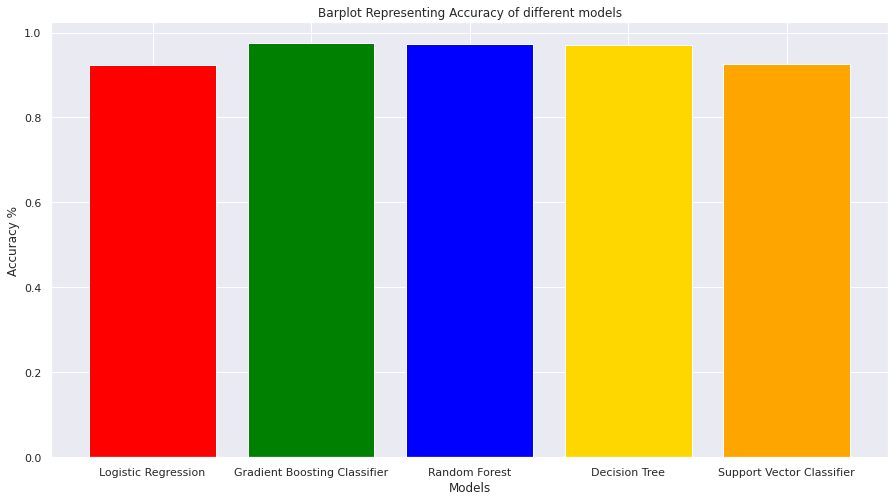

In [42]:
colors = ['red','green','blue','gold','orange']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## Final model

In [43]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
prediction=gb.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print("Gradient Boosting Classifier\n")
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix:\n\n",cm)
acc_gb=accuracy_score(y_test,prediction)
print("\nAccuracy=",acc_gb)
print("\nPrediction:",prediction)

Gradient Boosting Classifier

Confusion Matrix:

 [[  20   10    6]
 [   8   72    0]
 [   3    9 1312]]

Accuracy= 0.975

Prediction: [3 3 3 ... 3 3 3]


## Conclusion

Gradient Boosting Classifier Model performs best among all models with an accuracy of 97.5%.

